In [4]:
# Importamos las librerías
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = (12,  6)

In [5]:
# Para cargue de datos desde el directorio local
from google.colab import files
uploaded = files.upload()


Saving ventas-por-factura.csv to ventas-por-factura.csv


In [7]:
# Validamos el cargue
for filename in uploaded.keys():
    print(f"Archivo subido: {filename}")

Archivo subido: ventas-por-factura.csv


In [8]:
# Generamos el dataframe, renombramos las columnas para que queden en un lenguaje mas simpley lo visualizamos
ventas_cliente = list(uploaded.keys())[0]
df = pd.read_csv(ventas_cliente)
df.columns = ["Invoice_ID","Invoice_Date", "Customer_ID","Country",
            "Quantity","Amount"]
df.head()

,Invoice_ID,Invoice_Date,Customer_ID,Country,Quantity,Amount
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"


In [9]:
df.tail()

,Invoice_ID,Invoice_Date,Customer_ID,Country,Quantity,Amount
25948,C556518,6/13/2021 10:53:00,16794.0,United Kingdom,-2,"-12,70"
25949,553060,5/13/2021 10:44:00,15826.0,United Kingdom,488,"720,00"
25950,577049,11/17/2021 13:58:00,17397.0,United Kingdom,104,"298,78"
25951,550122,4/14/2021 12:39:00,12931.0,United Kingdom,1176,"1488,00"
25952,537999,12/9/2020 11:44:00,NaN,United Kingdom,-223,"0,00"


In [ ]:
# Validamos el tamaño del dataframe
df.shape

(25953, 6)

In [10]:
# Validamos el tamaño del dataframe de otra forma
num_rows, num_cols = df.shape
print(f"Número de filas: {num_rows}")
print(f"Número de columnas: {num_cols}")

Número de filas: 25953
Número de columnas: 6


In [11]:
# Validamos el tipo de datos de cada atributo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Invoice_ID    25953 non-null  object 
 1   Invoice_Date  25953 non-null  object 
 2   Customer_ID   22229 non-null  float64
 3   Country       25953 non-null  object 
 4   Quantity      25953 non-null  int64  
 5   Amount        25953 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [12]:
# Convertimos los datos de la columna Invoice Date en formato fecha sin la hora
df["Invoice_Date"] = pd.to_datetime(df["Invoice_Date"]).dt.date
df["Invoice_Date"] = pd.to_datetime(df["Invoice_Date"])

In [13]:
# Cambiamos comas por puntos y damos formato de número a los datos de la columna Amount
df["Amount"] = df["Amount"].str.replace(",",".").astype(float)

In [14]:
# Visualizamos el tipo de dato de cada atributo con las modificaciones realizadas
print(df.dtypes)

Invoice_ID              object
Invoice_Date    datetime64[ns]
Customer_ID            float64
Country                 object
Quantity                 int64
Amount                 float64
dtype: object


In [15]:
# Validamos cuantos datos nulos hay
df.isnull().sum()

,0
Invoice_ID,0
Invoice_Date,0
Customer_ID,3724
Country,0
Quantity,0
Amount,0


In [16]:
# Borramos las filas que contengan datos nulos y validamos de nuevo. Esto se hace ya que el dato Customer_ID no se puede reemplazar por estimaciones,
# y a pesar de que los nulos representan el 12% de la data se prefiere trabajar con la información qu este completa
df=df.dropna()
df.isnull().sum()

,0
Invoice_ID,0
Invoice_Date,0
Customer_ID,0
Country,0
Quantity,0
Amount,0


In [17]:
# Ejectamos el análisis descriptivo
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Invoice_Date,22229,2021-06-29 04:40:49.340951040,2020-12-01 00:00:00,2021-03-28 00:00:00,2021-07-08 00:00:00,2021-10-10 00:00:00,2021-12-09 00:00:00,NaN
Customer_ID,22229.0,15238.289892,12346.0,13755.0,15136.0,16746.0,18287.0,1732.981685
Quantity,22229.0,220.766026,-80995.0,30.0,120.0,254.0,80995.0,1169.102426
Amount,22229.0,373.465218,-168469.6,87.3,240.68,417.69,168469.6,2016.647262


In [ ]:
# Con lo anterior podemos decir que la mayo compra fue de 168.469, y la menor justo por el mismo valor negativo, lo que nos lleva a determinar que
# en la columna montos hay valores negativos. Lo mismo ocuerre para la columna cantidad
#También podemos decir que el promedio faturado es 373


In [18]:
# Ejecutamos el análisis descriptivo para todas las columnas
df.describe(include = "all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Invoice_ID,22229,22190,541849,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Invoice_Date,22229,NaN,NaN,NaN,2021-06-29 04:40:49.340951040,2020-12-01 00:00:00,2021-03-28 00:00:00,2021-07-08 00:00:00,2021-10-10 00:00:00,2021-12-09 00:00:00,NaN
Customer_ID,22229.0,NaN,NaN,NaN,15238.289892,12346.0,13755.0,15136.0,16746.0,18287.0,1732.981685
Country,22229,37,United Kingdom,19891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,22229.0,NaN,NaN,NaN,220.766026,-80995.0,30.0,120.0,254.0,80995.0,1169.102426
Amount,22229.0,NaN,NaN,NaN,373.465218,-168469.6,87.3,240.68,417.69,168469.6,2016.647262


In [ ]:
# Con este análisis podemos identificar que la mayor cantidad de ventas, se realizo en Reino Unido,
#y el cliente con más veces de compra es el 541849

In [19]:
# Dado que identificamos que las columas cantidad y monto tiene valores negativos y que estos están asociados a notas credito
# procedemos a elimiar las filas que las contengan

df = df[~df["Invoice_ID"].str.contains("C")]

In [20]:
# Generamos de nuevo el análisis decriptivo para el dataframe
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Invoice_Date,18570,2021-07-01 01:31:25.492730112,2020-12-01 00:00:00,2021-03-30 00:00:00,2021-07-12 00:00:00,2021-10-12 00:00:00,2021-12-09 00:00:00,NaN
Customer_ID,18570.0,15265.970813,12346.0,13772.5,15173.0,16779.0,18287.0,1734.016581
Quantity,18570.0,279.071459,1.0,74.0,155.0,290.75,80995.0,975.795133
Amount,18570.0,479.977379,0.0,157.685,302.865,471.2575,168469.6,1676.431595


In [ ]:
# Aqui ya vemos que la mayor venta fue por un monto de 168.469, y la menor por 0. Con esto identificamos ventas con valor 0
# que pueden desviar el análisis porque pueden se muestras.

In [21]:
# Elinamos las filas que contengan ventas con valor 0.
df[df["Amount"] == 0.0].shape
df = df[df["Amount"] > 0.0]

In [22]:
# Generamos de nuevo el análisis decriptivo para el dataframe
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Invoice_Date,18565,2021-07-01 01:12:59.337462784,2020-12-01 00:00:00,2021-03-30 00:00:00,2021-07-12 00:00:00,2021-10-12 00:00:00,2021-12-09 00:00:00,NaN
Customer_ID,18565.0,15266.260167,12346.0,13777.0,15175.0,16779.0,18287.0,1733.902649
Quantity,18565.0,278.43916,1.0,74.0,155.0,290.0,80995.0,971.75997
Amount,18565.0,480.106648,0.38,157.7,302.88,471.3,168469.6,1676.638835


In [ ]:
# Aqui ya vemos que la mayor venta fue por un monto de 168.469, y la menor por 0,38.

In [25]:
# generamos otro dataframe agrupando por cliente y pais asi:contando la cantidad de facturas generadas, sumando la cantidad y valor de las compras,
# asi tenemos una tabla por cliente que nos indica el pais de la ventas, las veces de compra y la cantidad y el valor dpor cliente.

dfagrupado = df.groupby(["Customer_ID", "Country"]).agg({"Invoice_ID": lambda x: x.nunique(),
    "Quantity": lambda x: x.sum(),
    "Amount": lambda x: x.sum()})
dfagrupado.head()

,,Invoice_ID,Quantity,Amount
Customer_ID,Country,,,
12346.0,United Kingdom,1,74215,77183.60
12347.0,Iceland,7,2458,4310.00
12348.0,Finland,4,2341,1797.24
12349.0,Italy,1,631,1757.55
12350.0,Norway,1,197,334.40


In [27]:
#Ordenamos el dataframe por el valor de compra
dfagrupado = dfagrupado.sort_values(by="Amount", ascending=False)
dfagrupado.head()

,,Invoice_ID,Quantity,Amount
Customer_ID,Country,,,
14646.0,Netherlands,73,196915,280206.02
18102.0,United Kingdom,60,64124,259657.30
17450.0,United Kingdom,46,69993,194550.79
16446.0,United Kingdom,2,80997,168472.50
14911.0,EIRE,201,80717,144601.36


In [50]:
#Ordenamos el dataframe por el valor de compra
dfagrupado = dfagrupado.sort_values(by="Invoice_ID", ascending=False)
dfagrupado.head()

,,Invoice_ID,Quantity,Amount
Customer_ID,Country,,,
12748.0,United Kingdom,209,25747,33719.73
14911.0,EIRE,201,80717,144601.36
17841.0,United Kingdom,124,23071,40991.57
13089.0,United Kingdom,97,31070,58825.83
14606.0,United Kingdom,93,6224,12156.65


In [26]:
# Validamos el tamaño del nuevo dataframe
df.shape

(18565, 6)

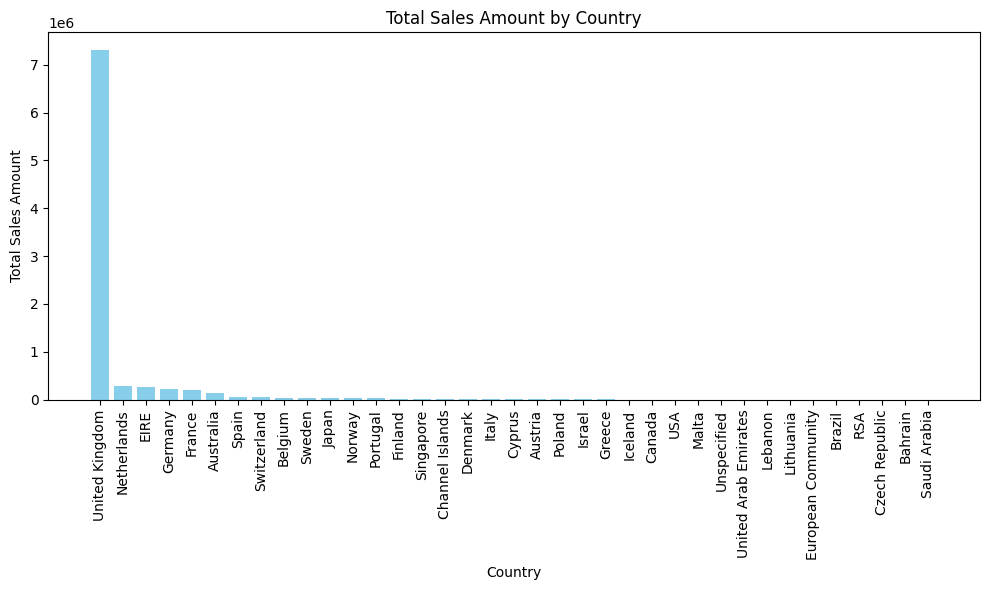

In [46]:
# Generamos un gráfico de barras de monto de ventas por país

sales_by_country = df.groupby("Country")["Amount"].sum().reset_index()
sales_by_country_sorted = sales_by_country.sort_values(by='Amount', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(sales_by_country_sorted["Country"], sales_by_country_sorted["Amount"], color='skyblue')

plt.xlabel('Country')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Country')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

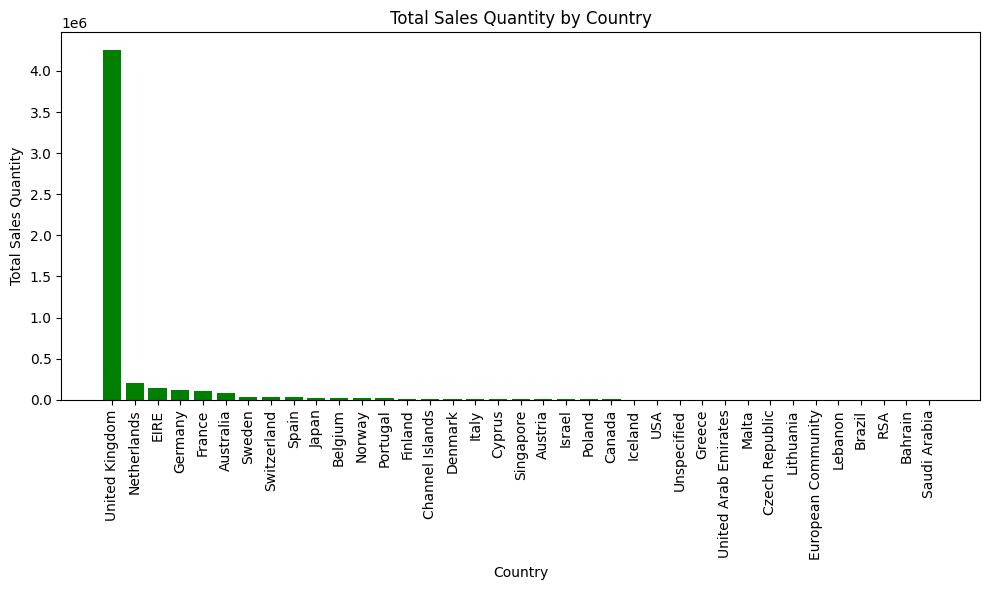

In [47]:
# Generamos un gráfico de barras de cantidad vendida por país

sales_by_country = df.groupby("Country")["Quantity"].sum().reset_index()
sales_by_country_sorted = sales_by_country.sort_values(by='Quantity', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(sales_by_country_sorted["Country"], sales_by_country_sorted["Quantity"], color='green')

plt.xlabel('Country')
plt.ylabel('Total Sales Quantity')
plt.title('Total Sales Quantity by Country')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

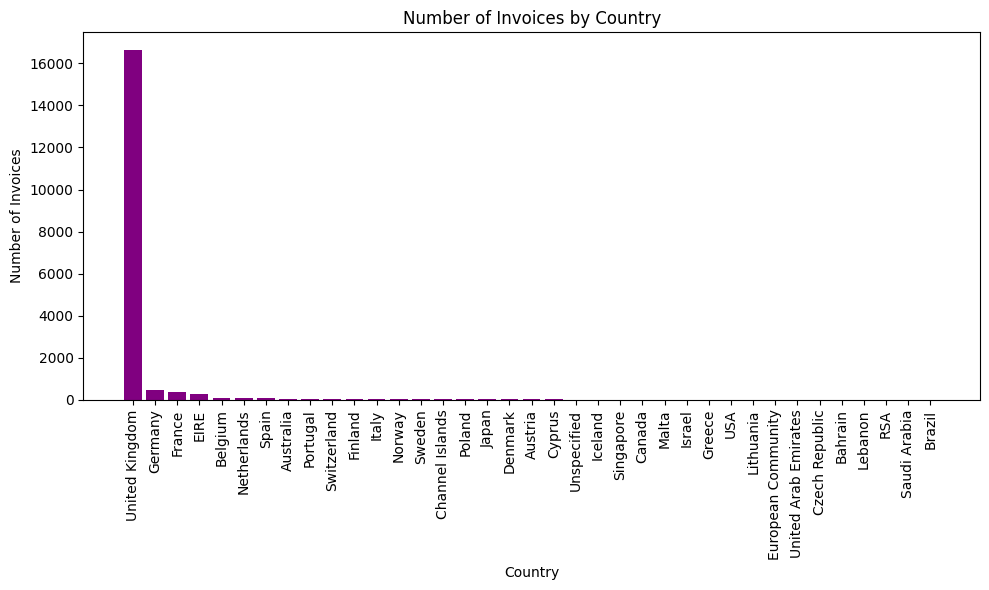

In [42]:
# Generamos un gráfico de barras de cantidad de facturas por país

invoice_count_by_country = df.groupby('Country')['Invoice_ID'].nunique().reset_index()
invoice_count_by_country.columns = ['Country', 'Number of Invoices']
invoice_count_by_country_sorted = invoice_count_by_country.sort_values(by='Number of Invoices', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(invoice_count_by_country_sorted['Country'], invoice_count_by_country_sorted['Number of Invoices'], color='purple')

plt.xlabel('Country')
plt.ylabel('Number of Invoices')
plt.title('Number of Invoices by Country')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

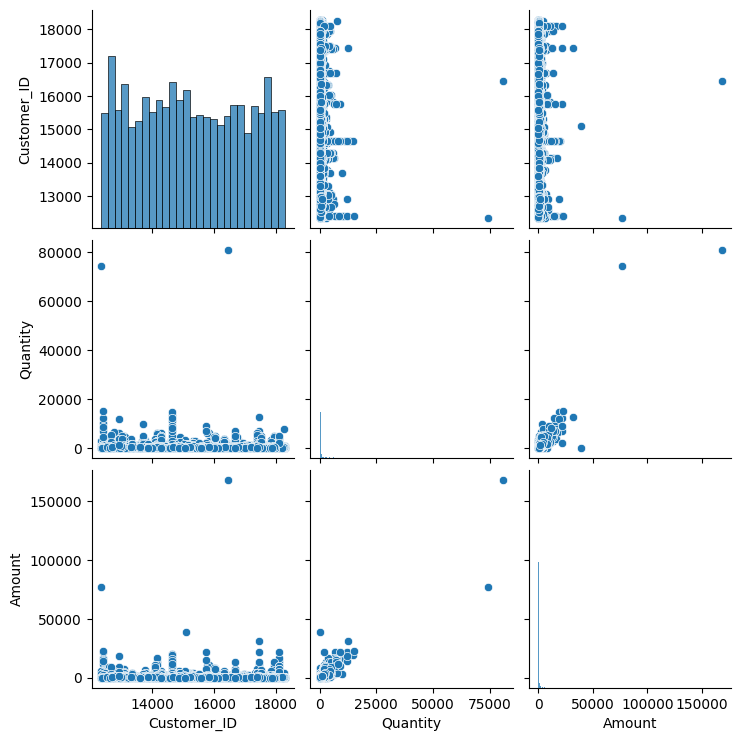

In [30]:
sns.pairplot(df)

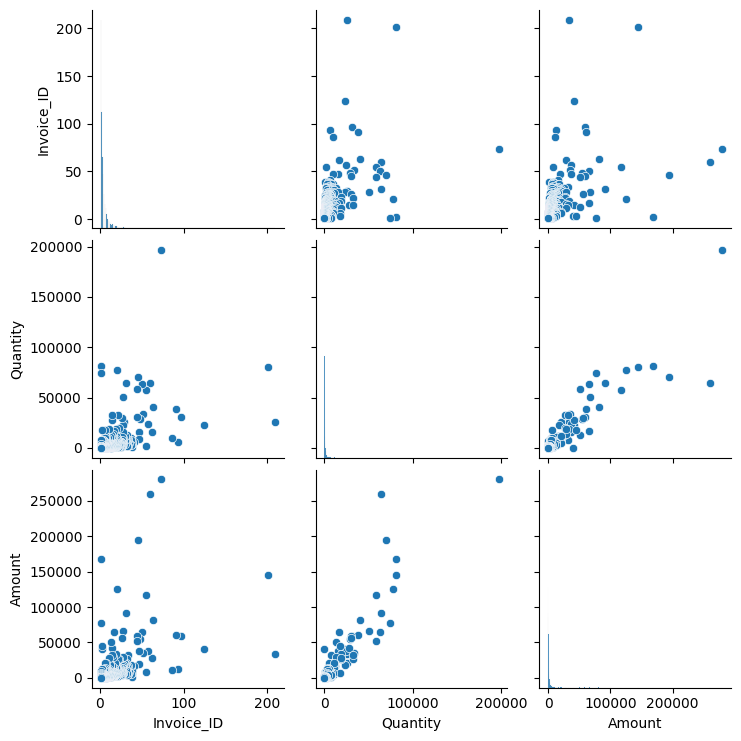

In [51]:
sns.pairplot(dfagrupado)

In [ ]:
# De acuerdo con el análisis de variables realizado podemos concluir que la cantidad y el valor de venta son variables que están directamente relacionadas,
# es decir que a mayor cantidad de venta, mayor valor vendido.
# Así mismo se identifica que el país con mayor cantidad y monto de ventas es Reino Unido,
# pero el cliente con mayor cantidad y valor de venta esta en Países bajos, aunque el cliente con mayor cantidad de ventas es de Reino Unido
# Los países por fuera de Reino Unido con mayor número de ventas son Alemania, Francia e Irlanda,
# Pero en monto vendido son Países bajos, Irlanda y Alemania.
# Lo anterior indique que las estrategias de venta se deben segmentar, ya que si bien el negocio esta funcionando en el país de origen,
# hay clientes potenciales en otras localidades a los cuales es necesario fidelizar, además de ganar posición en estos mercados